<a href="https://colab.research.google.com/github/JacobDaleOlguin/AI-RockPaperScissorsBot/blob/main/Tensor_Flow_Hand_Written_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Check the shape of the dataset
print("Training data shape:", train_images.shape)
print("Number of training samples:", len(train_labels))


Training data shape: (60000, 28, 28)
Number of training samples: 60000


In [ ]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary to see the structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2577 - accuracy: 0.9265 - val_loss: 0.1490 - val_accuracy: 0.9549
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1133 - accuracy: 0.9666 - val_loss: 0.1211 - val_accuracy: 0.9614
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0775 - accuracy: 0.9762 - val_loss: 0.0865 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0591 - accuracy: 0.9822 - val_loss: 0.0841 - val_accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0453 - accuracy: 0.9859 - val_loss: 0.0825 - val_accuracy: 0.9765
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0844 - val_accuracy: 0.9748
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0284 - accuracy: 0.9917 - val_loss: 0.0812 - val_ac

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.0923 - accuracy: 0.9769
Test accuracy: 97.69%


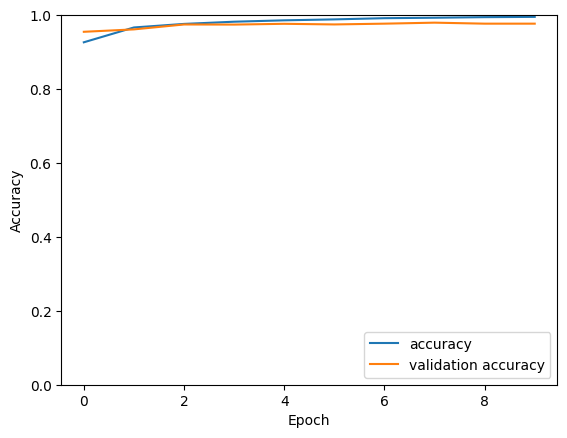

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('my_mnist_model.keras')

In [ ]:
from google.colab import files
files.download('my_mnist_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>